In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sqlalchemy import create_engine
from scipy.stats import ttest_ind
import scipy.stats as stats
import urllib
warnings.filterwarnings('ignore')

In [2]:
params = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-5RU5DHA\\SQLEXPRESS;"
    "DATABASE=inventory_db;"
    "Trusted_Connection=yes;"
)

In [3]:
engine = create_engine(
    f"mssql+pyodbc:///?odbc_connect={params}",
    fast_executemany=True
)

In [4]:
df = pd.read_sql_query("select * from final_summary",con = engine)

In [5]:
df.head(10)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.30,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.06,0.98,1.27
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.68,1.00,1.33
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.14,0.99,1.37
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.41,0.98,1.40
5,480,BACARDI USA INC,3858,Grey Goose Vodka,17.77,23.99,750,138809,2466635.93,141860,3383912.40,446932.09,111699.19,89286.27,917276.47,27.11,1.02,1.37
6,17035,PERNOD RICARD USA,2589,Jameson Irish Whiskey,30.76,39.99,1750,70783,2177285.08,69627,2773367.73,614529.34,127931.67,123780.22,596082.65,21.49,0.98,1.27
7,3960,DIAGEO NORTH AMERICA INC,3102,Smirnoff Traveler,12.94,17.99,1750,161386,2088334.84,148265,2592041.35,292586.29,272422.60,257032.07,503706.51,19.43,0.92,1.24
8,3960,DIAGEO NORTH AMERICA INC,3489,Tanqueray,20.73,27.99,1750,91835,1903739.55,90481,2640491.19,503661.02,166244.44,257032.07,736751.64,27.90,0.99,1.39
9,12546,JIM BEAM BRANDS COMPANY,1376,Jim Beam,16.29,21.99,1750,108866,1773427.14,107061,2435393.39,426902.78,196707.35,123880.97,661966.25,27.18,0.98,1.37


In [6]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00,3951.0000,7153.000,9552.0000,201359.00
Brand,10692.0,18039.228769,12662.187074,58.00,5793.5000,18761.500,25514.2500,90631.00
PurchasePrice,10692.0,24.385303,109.269375,0.36,6.8400,10.455,19.4825,5681.81
ActualPrice,10692.0,35.643671,148.246016,0.49,10.9900,15.990,28.9900,7499.99
Volume,10692.0,847.330153,664.344268,0.00,750.0000,750.000,750.0000,20000.00
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.00,36.0000,262.000,1975.7500,337660.00
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.71,453.4575,3655.465,20738.2450,3811251.60
TotalSalesQuantity,10692.0,3077.482136,10952.851391,0.00,33.0000,261.000,1929.2500,334939.00
TotalSalesDollars,10692.0,42239.074419,167655.265984,0.00,729.2200,5298.045,28396.9150,5101919.51
TotalSalesPrice,10692.0,18793.783627,44952.773386,0.00,289.7100,2857.800,16059.5625,672819.31


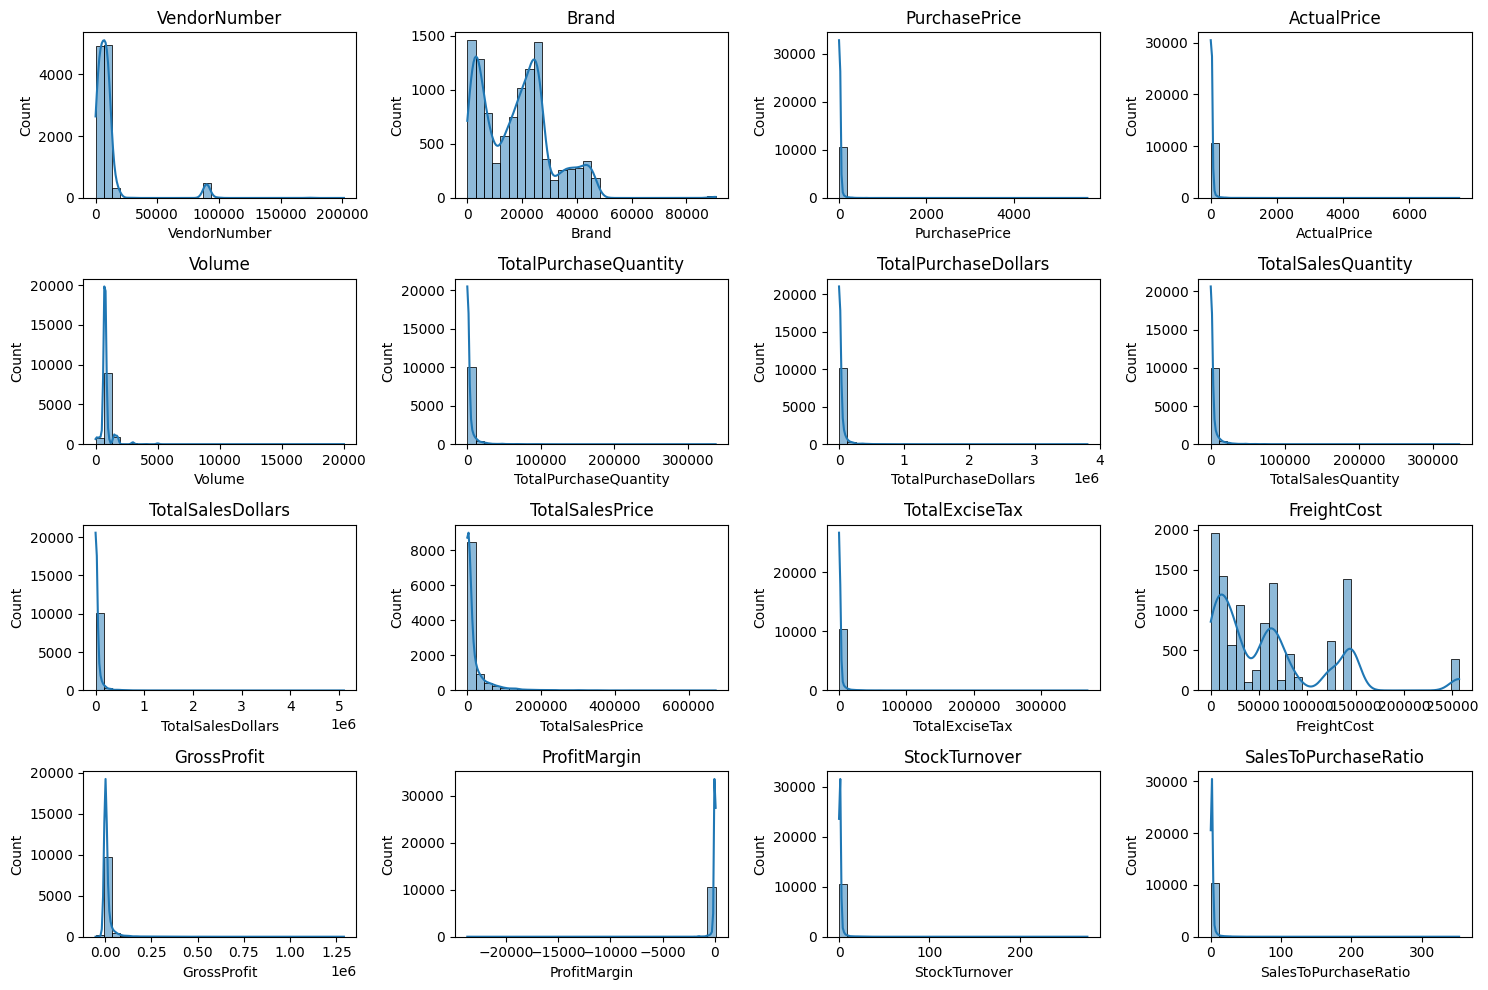

In [7]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde = True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

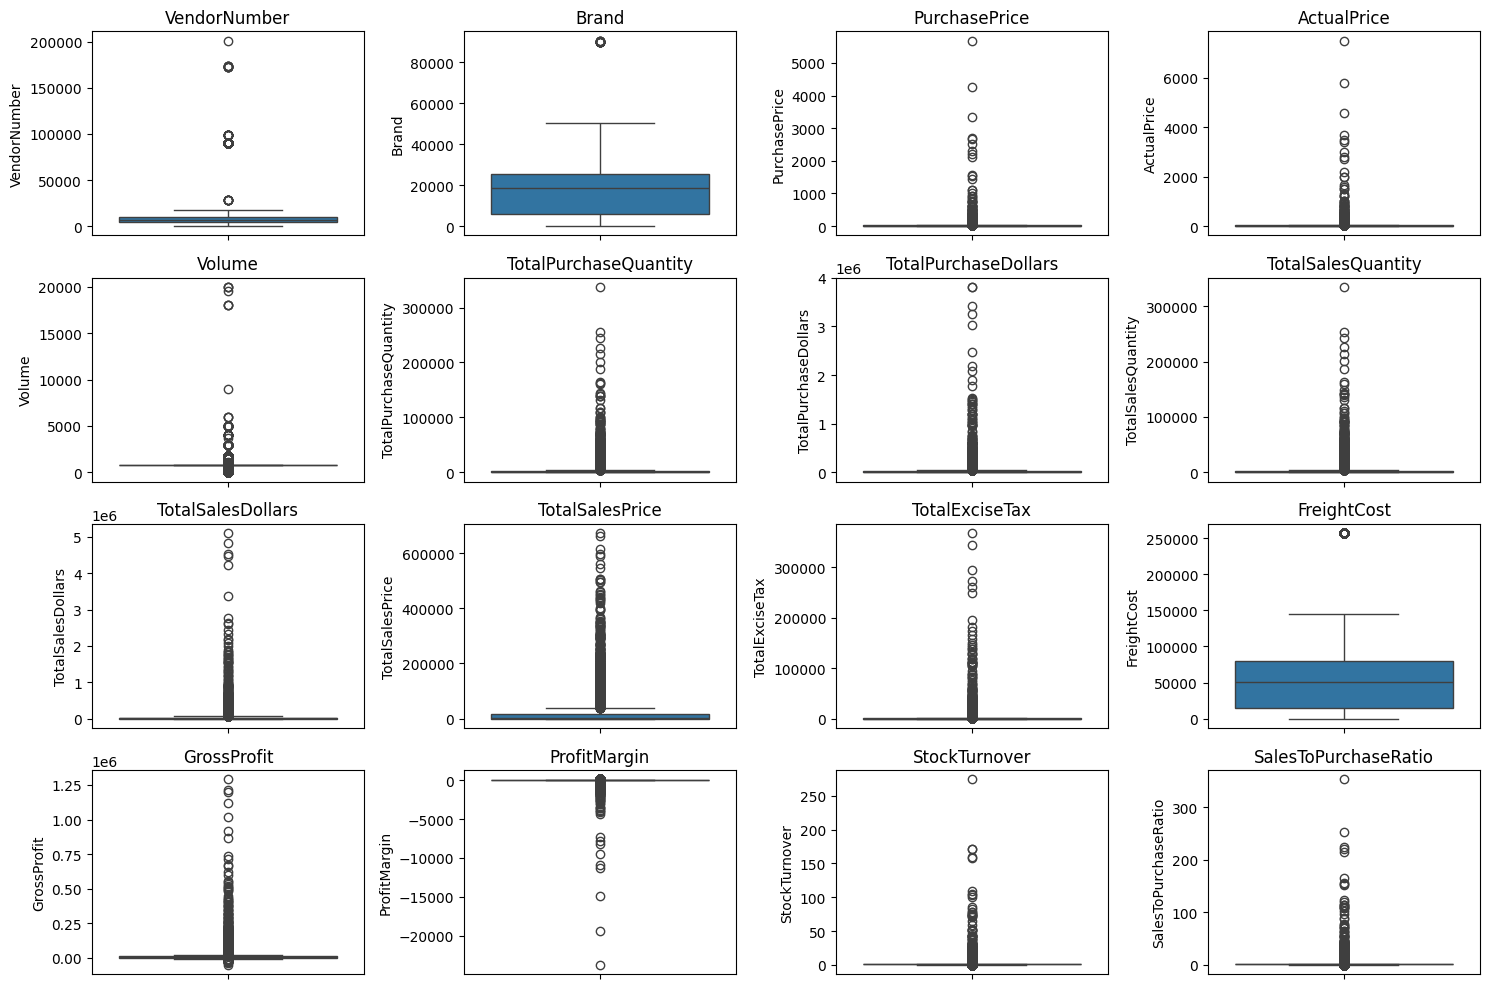

In [8]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [9]:
df = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""",con=engine)

In [10]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTunover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.30,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.06,0.98,1.27
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.68,1.00,1.33
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.14,0.99,1.37
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.41,0.98,1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.45,2.50,6.04
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.44,22.33,28.06
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.25,1.00,1.34
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.97,72.00,97.47


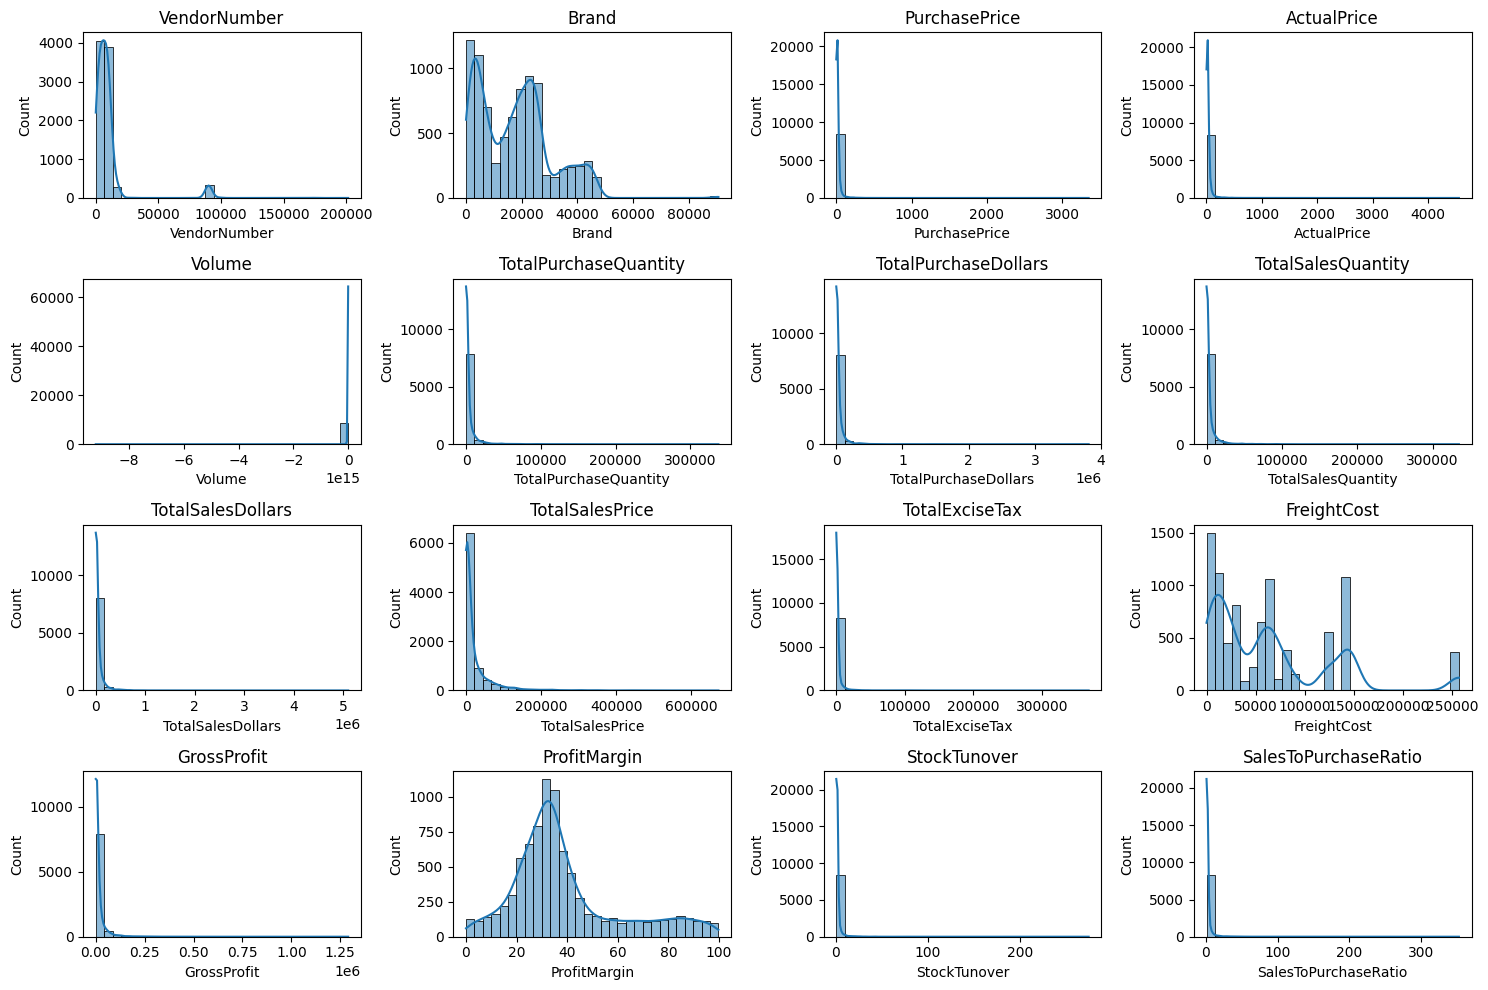

In [11]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde = True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

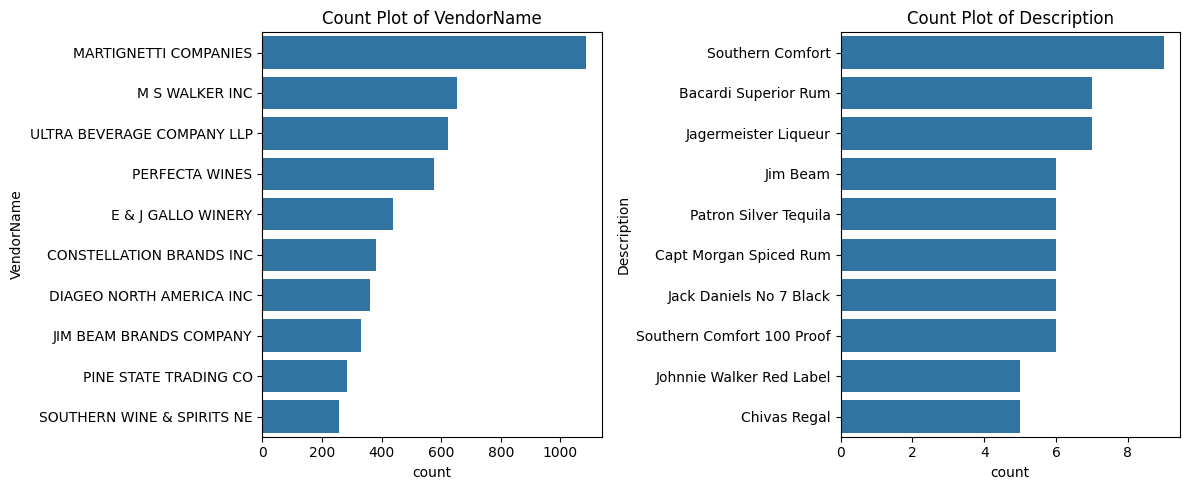

In [12]:
categorical_cols = ["VendorName", "Description"]
plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order = df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

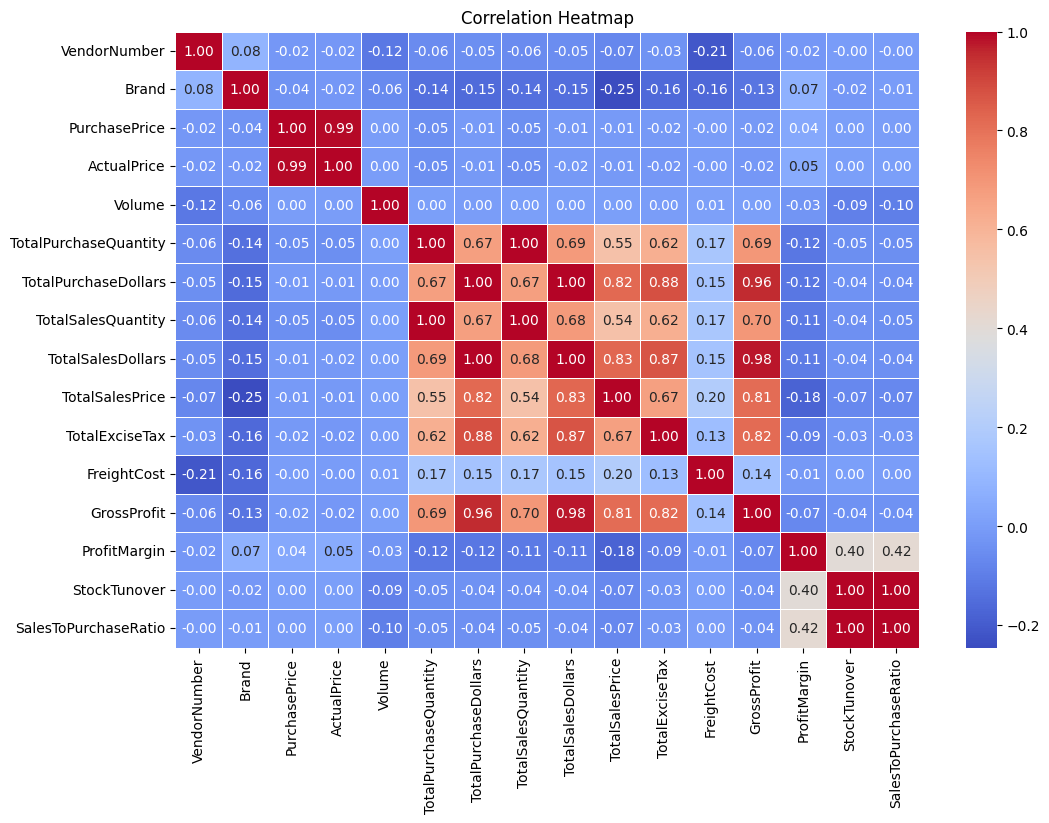

In [13]:
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt=".2f", cmap = "coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Key Insights from Correlation Heatmap

- **Purchase vs Actual Price**  
  Nearly identical (≈ 0.99), so your *ActualPrice* almost perfectly tracks *PurchasePrice*.

- **Spend ↔ Profit**  
  *TotalPurchaseDollars* and *GrossProfit* are extremely tightly linked (≈ 0.96), meaning higher purchase spend nearly always yields higher absolute profit.

- **Sales Dollars ↔ Sales Price & Excise Tax**  
  Strong correlations (0.83–0.87) show revenue and taxes rise in step with unit sale price.

- **Volume vs Dollars**  
  Moderate (0.67–0.69) correlations between quantities and dollar amounts, so more units generally drive more revenue but with noticeable variance.

- **Margin & Turnover**  
  Very low correlations (< 0.1) with all dollar/quantity metrics, indicating that high‑spend or high‑volume items don’t guarantee better margins or faster stock turnover.


# Data Analysis

### Identify Brands that need Promotional or Pricing Adjustments, which exhibit lower sales performance but higher profit margins

In [11]:
# Aggregate and sort
brand_performance = (
    df
    .groupby("Description")
    .agg(
        TotalSalesDollars = ("TotalSalesDollars","sum"),
        ProfitMargin      = ("ProfitMargin", "mean")
    )
    .sort_values("TotalSalesDollars", ascending=False)
    .reset_index()
)

brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,Jack Daniels No 7 Black,7964746.76,26.525000
1,Tito's Handmade Vodka,7399657.58,28.954000
2,Grey Goose Vodka,7209608.06,25.414000
3,Capt Morgan Spiced Rum,6356320.62,27.263333
4,Absolut 80 Proof,6244752.03,27.052000
...,...,...,...
7702,Allen's Blue Curacao Liqueur,5.99,20.030000
7703,Smirnoff Light Strawberry,5.94,50.170000
7704,Albero Sparkling Wh Organic,5.79,28.500000
7705,Firefly Ridge Chard,5.79,31.090000


In [12]:
low_sales_threshold = brand_performance["TotalSalesDollars"].quantile(0.15)
high_margin_threshold = brand_performance["ProfitMargin"].quantile(0.85)

In [13]:
low_sales_threshold

np.float64(560.299)

In [14]:
high_margin_threshold

np.float64(64.96799999999995)

In [15]:
opportunity_brands = (
    brand_performance
    .loc[
        (brand_performance["TotalSalesDollars"] < low_sales_threshold) &
        (brand_performance["ProfitMargin"]    > high_margin_threshold)
    ]
    .sort_values("ProfitMargin", ascending=False)
    .reset_index()
)

print(f"15th‐percentile sales cutoff:  {low_sales_threshold:,.2f}")
print(f"85th‐percentile margin cutoff: {high_margin_threshold:.2f}")
opportunity_brands

15th‐percentile sales cutoff:  560.30
85th‐percentile margin cutoff: 64.97


,index,Description,TotalSalesDollars,ProfitMargin
0,7409,The Club Strawbry Margarita,143.28,98.97
1,6825,Bacardi Oakheart Spiced Trav,399.60,98.13
2,6723,Chi Chi's Chocolate Malt RTD,461.58,98.11
3,6991,12 Days of Pearls Gift Set,309.69,97.68
4,7042,Mad Dogs & Englishmen Jumil,279.80,97.67
...,...,...,...,...
193,7350,Jean Luc Colombo Ruchets 07,159.98,65.51
194,7325,Viu Manent Cab Svgn La Capil,167.88,65.51
195,7528,Louis Jadot Chmble-Musgny 11,99.98,65.51
196,6976,Three Olives Tomato Vodka,314.79,65.25


In [16]:
brand_performance = brand_performance[brand_performance["TotalSalesDollars"]<10000]

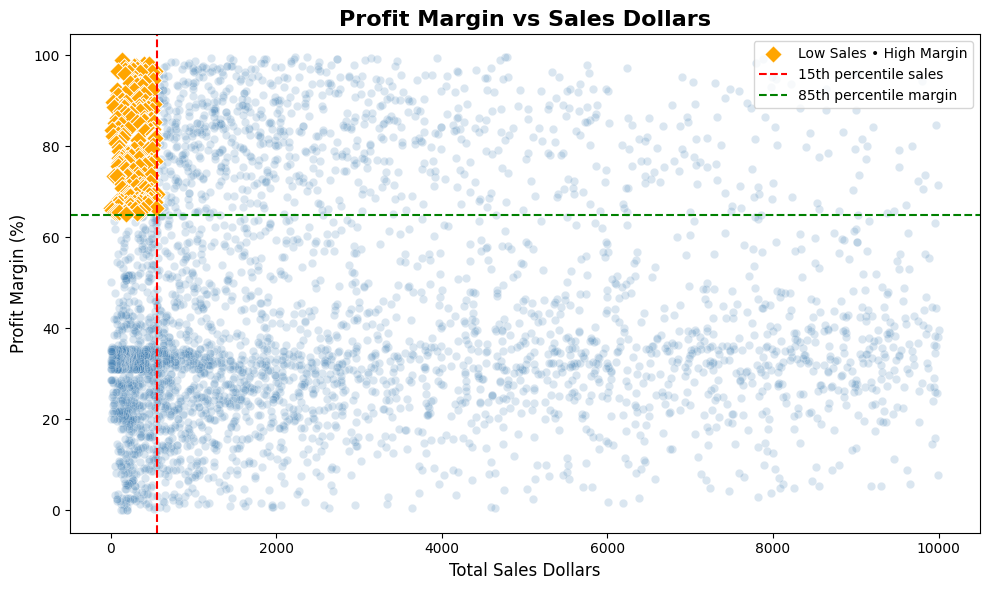

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=brand_performance,
    x="TotalSalesDollars",
    y="ProfitMargin",
    color="steelblue",
    alpha=0.2,
)

# Highlight the "hidden gems"
sns.scatterplot(
    data=opportunity_brands,
    x="TotalSalesDollars",
    y="ProfitMargin",
    color="orange",
    s=80,
    marker="D",
    label="Low Sales • High Margin"
)

# Add threshold lines
plt.axvline(low_sales_threshold, color="red", linestyle="--", label="15th percentile sales")
plt.axhline(high_margin_threshold, color="green", linestyle="--", label="85th percentile margin")

# Labels & Title
plt.title("Profit Margin vs Sales Dollars", fontsize=16, weight='bold')
plt.xlabel("Total Sales Dollars", fontsize=12)
plt.ylabel("Profit Margin (%)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### Which vendors and brands demonstrate the highest sales performance?

In [18]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [19]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [20]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [21]:
def format_dollars(value):
    """Format large dollar amounts with K/M suffix and a $ sign."""
    abs_value = abs(value)  # handle negative values
    if abs_value >= 1_000_000:
        formatted = f"${value / 1_000_000:.2f}M"
    elif abs_value >= 1_000:
        formatted = f"${value / 1_000:.2f}K"
    else:
        formatted = f"${value:.0f}"
    return formatted


In [22]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    $7.96M
Tito's Handmade Vodka      $7.40M
Grey Goose Vodka           $7.21M
Capt Morgan Spiced Rum     $6.36M
Absolut 80 Proof           $6.24M
Jameson Irish Whiskey      $5.72M
Ketel One Vodka            $5.07M
Baileys Irish Cream        $4.15M
Kahlua                     $3.60M
Tanqueray                  $3.46M
Name: TotalSalesDollars, dtype: object

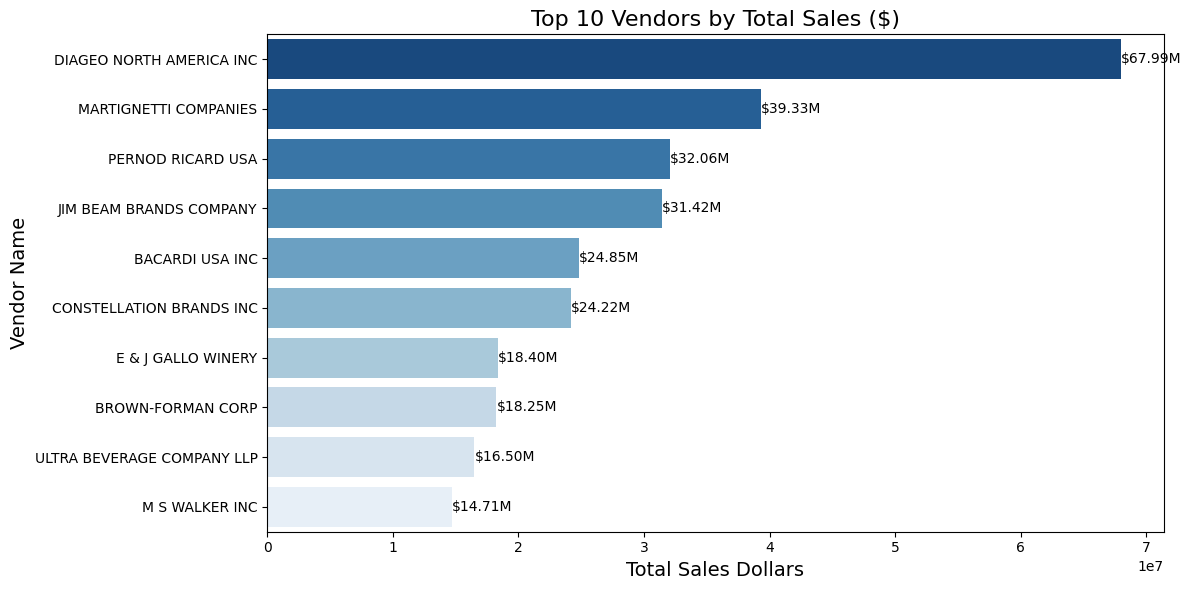

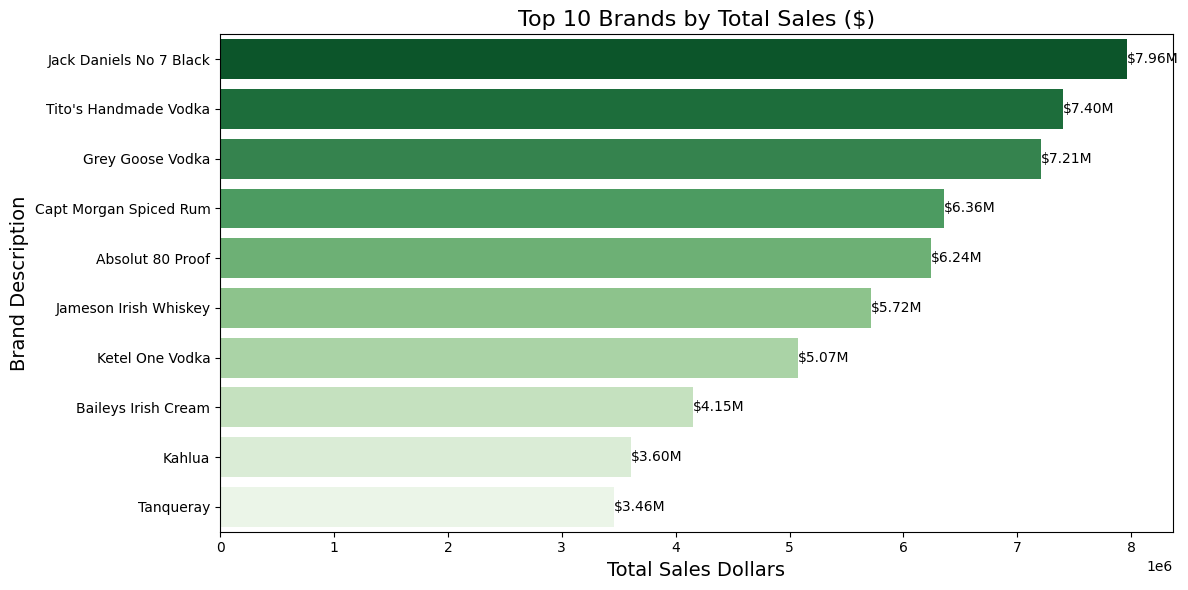

In [23]:
# --- Barplot for Top Vendors ---
plt.figure(figsize=(12, 6))
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="Blues_r")
plt.title("Top 10 Vendors by Total Sales ($)", fontsize=16)
plt.xlabel("Total Sales Dollars", fontsize=14)
plt.ylabel("Vendor Name", fontsize=14)

for i, value in enumerate(top_vendors.values):
    plt.text(value, i, format_dollars(value), va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# --- Barplot for Top Brands ---
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="Greens_r")
plt.title("Top 10 Brands by Total Sales ($)", fontsize=16)
plt.xlabel("Total Sales Dollars", fontsize=14)
plt.ylabel("Brand Description", fontsize=14)

for i, value in enumerate(top_brands.values):
    plt.text(value, i, format_dollars(value), va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Which vendors contibute the most to total purchase dollars

In [24]:
vendor_performance = df.groupby("VendorName").agg({
    "TotalPurchaseDollars": "sum",
    "GrossProfit": "sum",
    "TotalSalesDollars": "sum"
})

In [25]:
vendor_performance["PurchaseContribution%"] = (
    vendor_performance["TotalPurchaseDollars"] / vendor_performance["TotalPurchaseDollars"].sum()
) * 100

In [26]:
vendor_performance.sort_values("PurchaseContribution%", ascending=False, inplace=True)
vendor_performance = vendor_performance.round(2)   

In [27]:
top_vendors = (
    df.groupby("VendorName")
      .agg({
          "TotalSalesDollars": "sum",
          "TotalPurchaseDollars": "sum",
          "GrossProfit": "sum"
      })
      .nlargest(10, "TotalSalesDollars")
)

top_vendors["PurchaseContribution%"] = (
    (vendor_performance["TotalPurchaseDollars"] / vendor_performance["TotalPurchaseDollars"].sum()) * 100
).round(2)

top_vendors_display = top_vendors.copy()
top_vendors_display["TotalSalesDollars"] = top_vendors_display["TotalSalesDollars"].apply(format_dollars)
top_vendors_display["TotalPurchaseDollars"] = top_vendors_display["TotalPurchaseDollars"].apply(format_dollars)
top_vendors_display["GrossProfit"] = top_vendors_display["GrossProfit"].apply(format_dollars)

top_vendors_display


,TotalSalesDollars,TotalPurchaseDollars,GrossProfit,PurchaseContribution%
VendorName,,,,
DIAGEO NORTH AMERICA INC,$67.99M,$50.10M,$17.89M,16.30
MARTIGNETTI COMPANIES,$39.33M,$25.50M,$13.83M,8.30
PERNOD RICARD USA,$32.06M,$23.85M,$8.21M,7.76
JIM BEAM BRANDS COMPANY,$31.42M,$23.49M,$7.93M,7.64
BACARDI USA INC,$24.85M,$17.43M,$7.42M,5.67
CONSTELLATION BRANDS INC,$24.22M,$15.27M,$8.95M,4.97
E & J GALLO WINERY,$18.40M,$12.07M,$6.33M,3.93
BROWN-FORMAN CORP,$18.25M,$13.24M,$5.01M,4.31
ULTRA BEVERAGE COMPANY LLP,$16.50M,$11.17M,$5.34M,3.63


In [28]:
top_vendors["PurchaseContribution%"].sum().round(2)

np.float64(65.69)

In [29]:
top_vendors["Cumulative_Contribution%"] = top_vendors["PurchaseContribution%"].cumsum()

In [30]:
top_vendors

,TotalSalesDollars,TotalPurchaseDollars,GrossProfit,PurchaseContribution%,Cumulative_Contribution%
VendorName,,,,,
DIAGEO NORTH AMERICA INC,67990099.42,50097226.16,17892873.26,16.30,16.30
MARTIGNETTI COMPANIES,39330359.36,25502095.83,13828263.53,8.30,24.60
PERNOD RICARD USA,32063196.19,23851164.17,8212032.02,7.76,32.36
JIM BEAM BRANDS COMPANY,31423020.46,23494304.32,7928716.14,7.64,40.00
BACARDI USA INC,24854817.14,17432020.26,7422796.88,5.67,45.67
CONSTELLATION BRANDS INC,24218745.65,15273708.08,8945037.57,4.97,50.64
E & J GALLO WINERY,18399899.46,12068539.22,6331360.24,3.93,54.57
BROWN-FORMAN CORP,18247230.65,13238939.18,5008291.47,4.31,58.88
ULTRA BEVERAGE COMPANY LLP,16502544.31,11167081.61,5335462.70,3.63,62.51


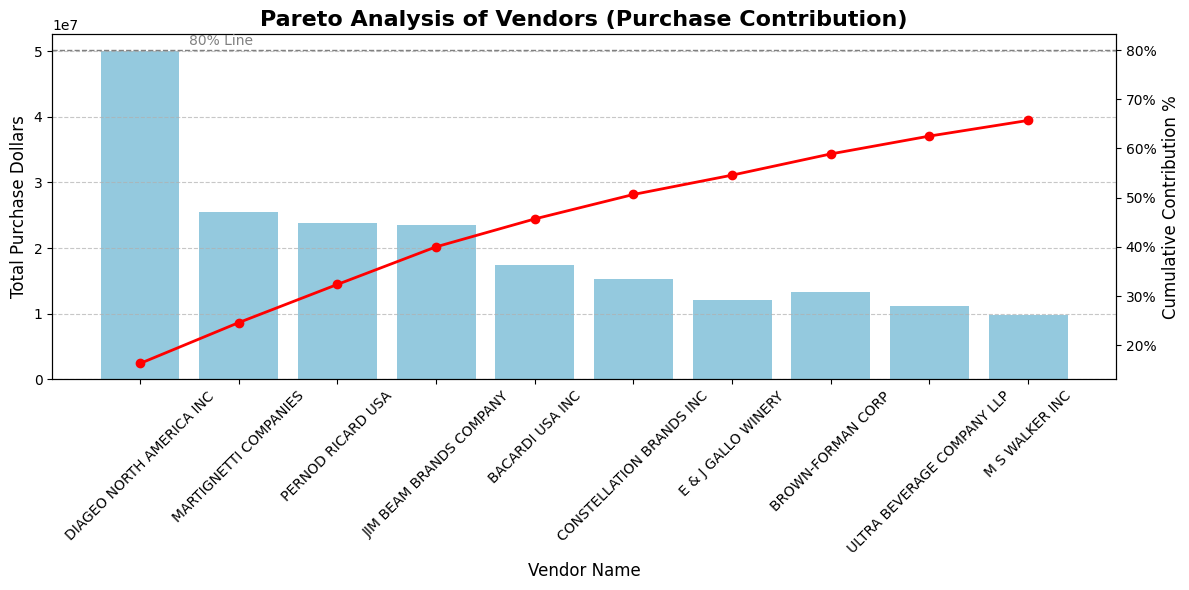

In [31]:
import matplotlib.ticker as ticker
fig, ax1 = plt.subplots(figsize=(12,6))

# Barplot: Total Purchase Dollars
sns.barplot(
    x=top_vendors.index,
    y=top_vendors["TotalPurchaseDollars"],
    color="skyblue",
    ax=ax1
)

ax1.set_ylabel("Total Purchase Dollars", fontsize=12)
ax1.set_xlabel("Vendor Name", fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# 🎯 Line Plot for Cumulative %
ax2 = ax1.twinx()  # second y-axis
ax2.plot(
    top_vendors.index,
    top_vendors["Cumulative_Contribution%"],
    color="red",
    marker="o",
    linewidth=2
)

ax2.set_ylabel("Cumulative Contribution %", fontsize=12)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter())

# 🎯 Add grid & title
ax1.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Pareto Analysis of Vendors (Purchase Contribution)", fontsize=16, fontweight='bold')

# 🎯 Draw 80/20 line for reference
ax2.axhline(80, color="gray", linestyle="--", linewidth=1)
plt.text(0.5, 81, "80% Line", color="gray")

plt.tight_layout()
plt.show()

### How much of total procurement is dependent on the top vendors?

In [32]:
print(f'Total Purchase Contribution of top 10 vendors is {round(top_vendors["PurchaseContribution%"].sum(), 2)}%')

Total Purchase Contribution of top 10 vendors is 65.69%


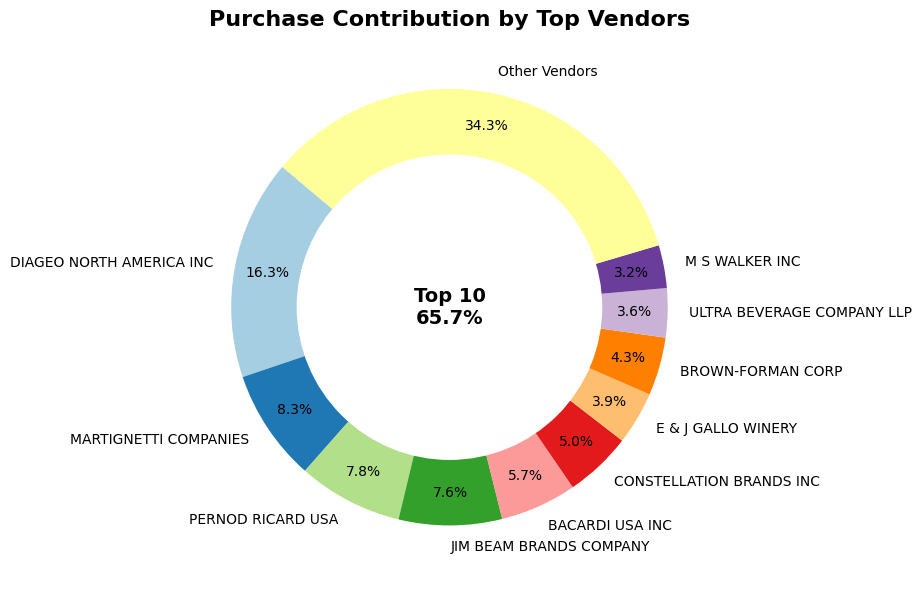

In [33]:
vendors = list(top_vendors.index)  # Vendor names from index
purchase_contributions = list(top_vendors["PurchaseContribution%"].values)

# Calculate remaining contribution (if less than 100%)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

if remaining_contribution > 0:
    vendors.append("Other Vendors")
    purchase_contributions.append(remaining_contribution)

# --- PLOT ---
fig, ax = plt.subplots(figsize=(8, 6))

# Create pie chart (donut)
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct="%1.1f%%",
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig.gca().add_artist(centre_circle)

# Add total contribution text inside the donut
plt.text(0, 0, f"Top 10\n{total_contribution:.1f}%", ha="center", va="center", fontsize=14, fontweight="bold")

plt.title("Purchase Contribution by Top Vendors", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()


### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [34]:
df["UnitPurchasePrice"] = df["TotalPurchaseDollars"] / df["TotalPurchaseQuantity"].replace(0, np.nan)

In [35]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTunover,SalesToPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.30,0.98,1.34,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.06,0.98,1.27,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.68,1.00,1.33,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.14,0.99,1.37,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.41,0.98,1.40,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.45,2.50,6.04,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.44,22.33,28.06,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.25,1.00,1.34,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.97,72.00,97.47,1.47


In [36]:
df["OrderSize"] = pd.qcut(
    df["TotalPurchaseQuantity"], 
    q=3, 
    labels=["Small", "Medium", "Large"]
)

In [37]:
df["OrderSize"]

0       Large
1       Large
2       Large
3       Large
4       Large
        ...  
8559    Small
8560    Small
8561    Small
8562    Small
8563    Small
Name: OrderSize, Length: 8564, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']

In [38]:
df.groupby("OrderSize")["UnitPurchasePrice"].mean()

OrderSize
Small     39.068186
Medium    15.486414
Large     10.777625
Name: UnitPurchasePrice, dtype: float64

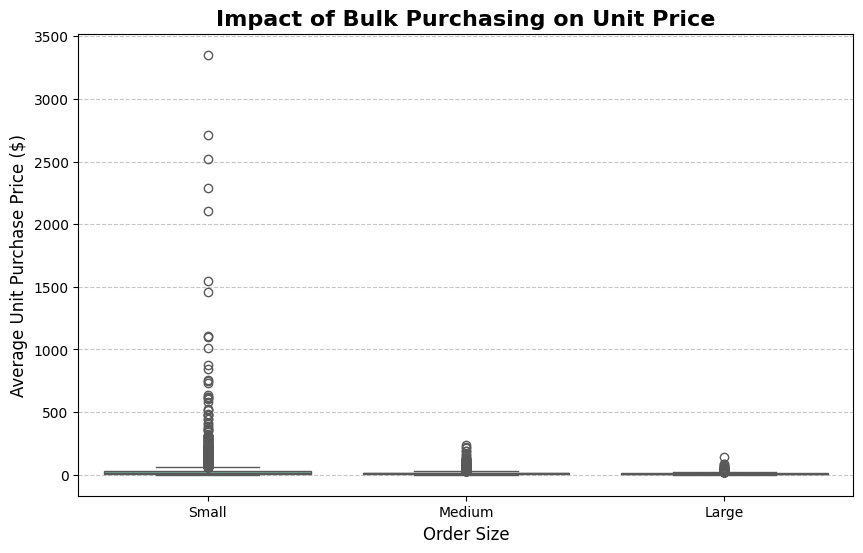

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="OrderSize",
    y="UnitPurchasePrice",
    palette="Set2"
)

plt.title("Impact of Bulk Purchasing on Unit Price", fontsize=16, fontweight='bold')
plt.xlabel("Order Size", fontsize=12)
plt.ylabel("Average Unit Purchase Price ($)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- **Bulk buying reduces unit prices**  
  - Large orders have the **lowest median unit purchase price** (consistent with supplier discounts).  
  - Small orders show a **higher median price**, suggesting that buying in smaller quantities costs more.

- **High price volatility for small orders**  
  - The **Small** category has many **extreme outliers**, some priced several thousand dollars per unit.  
  - This indicates **premium or specialty items** are often purchased in small quantities.

- **Medium & large orders are more stable**  
  - Medium and Large order sizes have **tighter price distributions** with fewer outliers, suggesting suppliers maintain consistent pricing for bulk deals.

- **Procurement strategy implication**  
  - Encouraging **bulk purchases** could lead to **lower average costs** and **more predictable pricing**.


### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [40]:
df[df["StockTunover"] < 1] \
    .groupby("VendorName")[["StockTunover"]].mean() \
    .sort_values("StockTunover",ascending=True).head(10)

,StockTunover
VendorName,
ALISA CARR BEVERAGES,0.620000
HIGHLAND WINE MERCHANTS LLC,0.710000
PARK STREET IMPORTS LLC,0.750000
Circa Wines,0.755385
KLIN SPIRITS LLC,0.760000
Dunn Wine Brokers,0.767500
CENTEUR IMPORTS LLC,0.772500
SMOKY QUARTZ DISTILLERY LLC,0.780000
TAMWORTH DISTILLING,0.800000


### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [41]:
df["UnsoldInventory"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]

print("Total Unsold Capital:", format_dollars(df["UnsoldInventory"].sum()))


Total Unsold Capital: $2.71M


In [42]:
inventory_value_per_vendor = (
    df.groupby("VendorName")["UnsoldInventory"]
      .sum()
      .reset_index()
      .sort_values(by="UnsoldInventory", ascending=False)
)

inventory_value_per_vendor["UnsoldInventory"] = inventory_value_per_vendor["UnsoldInventory"].apply(format_dollars)

inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventory
25,DIAGEO NORTH AMERICA INC,$722.21K
46,JIM BEAM BRANDS COMPANY,$554.67K
68,PERNOD RICARD USA,$470.63K
116,WILLIAM GRANT & SONS INC,$401.96K
30,E & J GALLO WINERY,$228.28K
79,SAZERAC CO INC,$198.44K
11,BROWN-FORMAN CORP,$177.73K
20,CONSTELLATION BRANDS INC,$133.62K
61,MOET HENNESSY USA INC,$126.48K
77,REMY COINTREAU USA INC,$118.60K


### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors

In [43]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

print(f"Top 25% sales threshold: {format_dollars(top_threshold)}")
print(f"Bottom 25% sales threshold: {format_dollars(low_threshold)}")

Top 25% sales threshold: $40.62K
Bottom 25% sales threshold: $1.36K


In [44]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [45]:
top_vendors

0       25.30
1       21.06
2       24.68
3       27.14
4       28.41
        ...  
3523    79.68
3681    85.78
4751    93.09
4920    95.01
5050    94.27
Name: ProfitMargin, Length: 2141, dtype: float64

In [46]:
low_vendors

5631     4.11
5652     6.15
5701    12.01
5704     1.68
5724     7.24
        ...  
8559    83.45
8560    96.44
8561    25.25
8562    98.97
8563    99.17
Name: ProfitMargin, Length: 2141, dtype: float64

In [47]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data)-1)  # t critical value
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

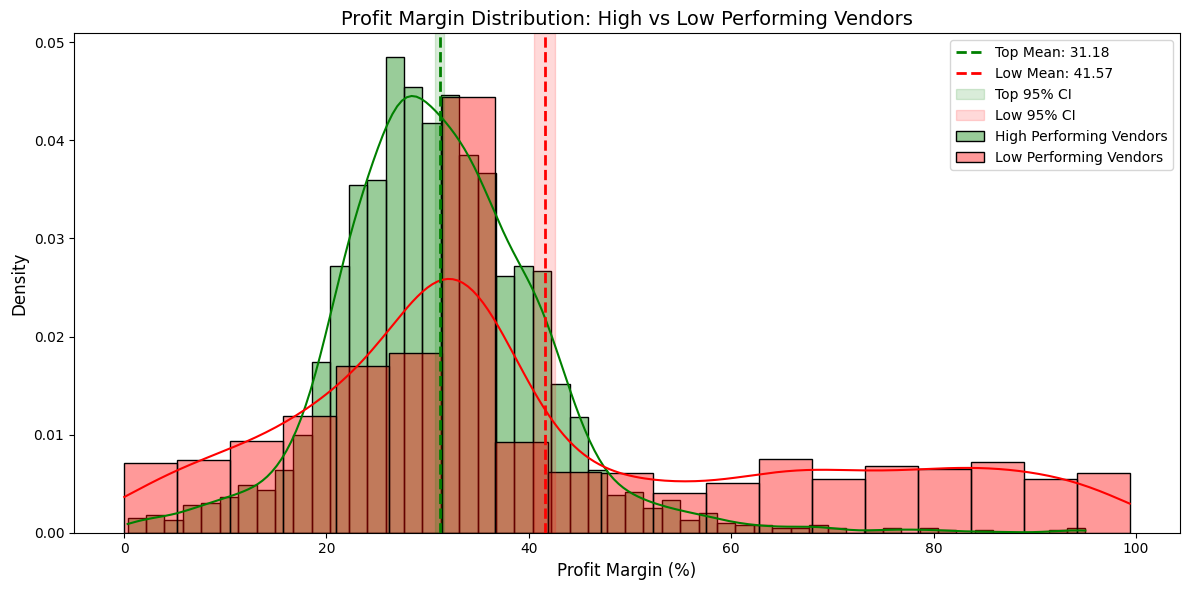

In [48]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Plot histograms
plt.figure(figsize=(12, 6))
sns.histplot(top_vendors, color="green", label="High Performing Vendors", kde=True, stat="density", alpha=0.4)
sns.histplot(low_vendors, color="red", label="Low Performing Vendors", kde=True, stat="density", alpha=0.4)

# Add vertical lines for means
plt.axvline(top_mean, color="green", linestyle="--", linewidth=2, label=f"Top Mean: {top_mean:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", linewidth=2, label=f"Low Mean: {low_mean:.2f}")

# Add shaded regions for confidence intervals
plt.axvspan(top_lower, top_upper, color="green", alpha=0.15, label="Top 95% CI")
plt.axvspan(low_lower, low_upper, color="red", alpha=0.15, label="Low 95% CI")

# Titles & labels
plt.title("Profit Margin Distribution: High vs Low Performing Vendors", fontsize=14)
plt.xlabel("Profit Margin (%)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### Insights from the Profit Margin Distribution

- **Low-performing vendors have higher average margins**  
  - The red dashed line (mean ≈ **41.6%**) is to the right of the green dashed line (mean ≈ **31.2%**).  
  - Vendors with lower sales tend to keep **higher profit margins per unit**, possibly selling **niche or premium products**.

- **High-performing vendors trade off margin for volume**  
  - High sales vendors (green) show a **lower mean profit margin**, suggesting they rely on **competitive pricing strategies** or **bulk discounts** to drive higher sales.

- **Wider spread among low-performing vendors**  
  - The red distribution has **longer tails and more outliers**, with some vendors pricing extremely high while others remain in mid-range margins.  
  - This indicates **inconsistent pricing among low-sales vendors**.

- **High-performing vendors are more consistent**  
  - The green distribution is **tightly packed**, meaning margins are relatively stable — likely due to **standardized pricing** or **long-term supplier agreements**.

- **Procurement & Strategy Implications**  
  - Relying solely on **high-margin, low-sales vendors** could lead to **inventory stagnation**.  
  - High-sales vendors, despite lower margins, **move volume efficiently** and contribute more to **overall revenue growth**.


### Is there a significant difference in profit margins between top-performing and low-performing vendors?

In [49]:
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -17.6693, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


In [50]:
df = pd.read_sql_query("SELECT * FROM final_summary", con=engine)

# Export DataFrame to CSV
output_path = "./data/final_summary.csv"
df.to_csv(output_path, index=False)

output_path

'./data/final_summary.csv'